In [1]:
from IPython.display import display, HTML, YouTubeVideo
from IPython.display import Video

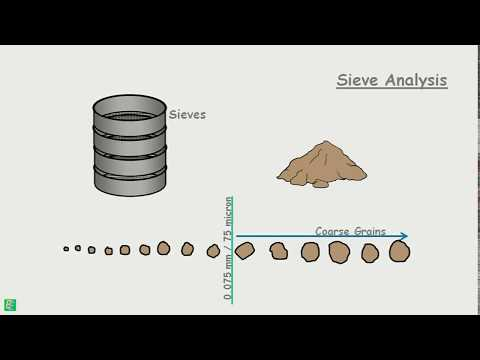

In [2]:
display(YouTubeVideo("AM-NrQoRIYY",
                     width=350,height=200,title="Argo Online School",
                    allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture allowfullscreen"))

In [3]:
# used Python library
import numpy as np # for calculation 
import matplotlib.pyplot as plt  # for plotting
import pandas as pd  # for data table
import ipywidgets as widgets # for widgets
#%matplotlib widget
import warnings; warnings.simplefilter('ignore')
from scipy.interpolate import interp1d,CubicSpline,UnivariateSpline,Rbf
from scipy import interpolate

#from scipy.interpolate import Rbf

print("Please provide the seive data in the boxes:  ")

def SA(mu, m1, m2, m3, m4, ml,perdat):
    dia = [6,2,0.6,0.2, 0.06, 0.01] # mm, diameter <0.06 (cup)= 0.01, >2 = 6
    mass = [mu, m1, m2, m3, m4, ml] # g, the residue in seive 
    Total_mass = np.sum(mass)  # add the mass column to get total mass
    retain_per = np.round(mass/Total_mass*100,3)   # retain percentage
    retain_per_cumsum = np.round(np.cumsum(retain_per),3) # get the cummulative sum of the reatined
    passing_per = np.round(100 - retain_per_cumsum, 3) # substract 100-cummsum to get passing %
    data = {"mesh diameter [mm]": dia, "residue in the sieve [g]": mass, "Σtotal": retain_per, "Σ/Σtotal": passing_per }

    df1= pd.DataFrame(data)
    df1 = df1.set_index("mesh diameter [mm]")
    print(df1)

    plt.rcParams['axes.linewidth']=2
    #plt.rcParams["axes.edgecolor"]='white'
    plt.rcParams['grid.linestyle']='--'
    plt.rcParams['grid.linewidth']=1
    x = np.append([20],dia) # adding data to extend over 6 mm dia
    y = np.append([100],passing_per) # adding 100% to plot
    
    
    y.sort()
    x.sort()
    interp_func = interp1d(y,x)
    #interp_func=interpolate.splev(y,x, der=0)
    #interp_func = UnivariateSpline(y, x)
    #interp_func = CubicSpline(y, x)
    #interp_func = Rbf(y, x)
    
    Dd60 = interp_func(60)
    Dd10=interp_func(10)
    Ddx=interp_func(perdat)
    

    
    print('\n','\n')
    print("d60 =","%.2f" % Dd60)
    print("d10 =","%.2f" % Dd10)
    print ('d%d = %.2f' % (perdat, Ddx))
    

    
    
    fig,ax = plt.subplots(figsize=(15,10))
    fig.canvas.header_visible = False
    plt.semilogx(x, y, 'x-', color='red')  
    tics=x.tolist()

    ax.grid(which='major', color='k', alpha=0.7) 
    ax.grid(which='minor', color='k', alpha=0.3)
    ax.set_xticks(x);  
    ax.set_yticks(np.arange(0,110,10));
    plt.title('grain size distribution');
    plt.xlabel('grain size d [mm]');
    plt.ylabel('grain fraction < d ins % of total mass');

    plt.plot([0,Dd60,Dd60,Dd60],[60,60,0,60],ls='-',color='g');
    plt.plot([0,Dd10,Dd10,Dd10],[10,10,0,10],ls='-',color='r');
    plt.plot([0,Ddx,Ddx,Ddx],[perdat,perdat,0,perdat],ls='-',color='#8A2BE2')
    ax.set_xlim(0, 30)
    from matplotlib.ticker import StrMethodFormatter
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:0.2f}'))
    
    #return(Dd60,Dd10)
    
style = {'description_width': '200px'}    

Inter=widgets.interact_manual(SA, 
                       mu= widgets.FloatText(description="6 mm", style=style),
                       m1= widgets.FloatText(description="2 mm",style=style),
                       m2= widgets.FloatText(description="0.6 mm", style=style),
                       m3= widgets.FloatText(description="0.2 mm", style=style),
                       m4= widgets.FloatText(description="0.06 mm", style=style),
                       ml= widgets.FloatText(description="0.01 mm", style=style),
                       perdat= widgets.FloatText(description="Enter Fineness % ", style=style)     )



Please provide the seive data in the boxes:  


interactive(children=(FloatText(value=0.0, description='6 mm', style=DescriptionStyle(description_width='200px…

In [4]:
def SA2(d10, d60, t):
    U = d60/d10
    K_h =  0.0116*(0.7+0.03*t)*d10**2
    print("\n The coefficient of non-uniformity: {0:0.2f}".format(U), "\n")
    print("The Hydraulic Conductivity based on Hazen Formula: {0:0.2e} m/s".format(K_h))

style = {'description_width': '200px'}    

Inter=widgets.interact_manual(SA2, 
                       d10= widgets.FloatText(description="d10 (mm)", style=style),
                       d60= widgets.FloatText(description="d60 (mm)",style=style),
                       t= widgets.FloatText(description="Temperature (°C)", style=style))

interactive(children=(FloatText(value=0.0, description='d10 (mm)', style=DescriptionStyle(description_width='2…